In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Shapiro - Wilk

The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis (that the data came from a normally distributed population) can not be rejected (e.g., for an alpha level of .05, a data set with a p value of less than .05 rejects the null hypothesis that the data are from a normally distributed population).

Like most statistical significance tests, if the sample size is not sufficiently large this test may detect even trivial departures from the null hypothesis (i.e., although there may be some statistically significant effect, it may be too small to be of any practical significance); thus, additional investigation of the effect size is typically advisable, e.g., a Q–Q plot in this case.

In [4]:
normal_data = sct.norm.rvs(loc=10, scale=4, size=1000)
non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=1000)
expon_data = sct.expon.rvs(loc=10, scale=4, size=1000)
a = np.random.randint(-33,450, 1000)


print(sct.shapiro(normal_data))
print(sct.shapiro(expon_data))
print(sct.shapiro(non_normal_data))
print(sct.shapiro(a))

alpha = 1e-3
k1, p = sct.shapiro(expon_data)
if  p <alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

ShapiroResult(statistic=0.9973689913749695, pvalue=0.1048964262008667)
ShapiroResult(statistic=0.816177487373352, pvalue=2.7701614648137593e-32)
ShapiroResult(statistic=0.8317874073982239, pvalue=3.660057061638371e-31)
ShapiroResult(statistic=0.9577564001083374, pvalue=2.1665533132834622e-16)
The null hypothesis can be rejected


## Jarque-Bera

In statistics, the Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. The test is named after Carlos Jarque and Anil K. Bera. The test statistic is always nonnegative. If it is far from zero, it signals the data do not have a normal distribution.

If the data comes from a normal distribution, the JB statistic asymptotically has a chi-squared distribution with two degrees of freedom, so the statistic can be used to test the hypothesis that the data are from a normal distribution. The null hypothesis is a joint hypothesis of the skewness being zero and the excess kurtosis being zero. Samples from a normal distribution have an expected skewness of 0 and an expected excess kurtosis of 0 (which is the same as a kurtosis of 3). As the definition of JB shows, any deviation from this increases the JB statistic.

For small samples the chi-squared approximation is overly sensitive, often rejecting the null hypothesis when it is true. Furthermore, the distribution of p-values departs from a uniform distribution and becomes a right-skewed unimodal distribution, especially for small p-values. This leads to a large Type I error rate. The table below shows some p-values approximated by a chi-squared distribution that differ from their true alpha levels for small samples.

In [5]:
normal_data = sct.norm.rvs(loc=10, scale=4, size=10000)
non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=10000)
a = np.random.randint(-33,450, 10000)

print(sct.jarque_bera(normal_data))
print(sct.jarque_bera(non_normal_data))
print(sct.jarque_bera(a))


alpha = 1e-3
k1, p = sct.jarque_bera(non_normal_data)
if  p <alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Jarque_beraResult(statistic=1.038695953711781, pvalue=0.5949083155300936)
Jarque_beraResult(statistic=21398.67375924436, pvalue=0.0)
Jarque_beraResult(statistic=597.2584858884798, pvalue=0.0)
The null hypothesis can be rejected


## Normal Tests - D'agostino and Persons

In [6]:
normal_data = sct.norm.rvs(loc=10, scale=4, size=1000)
non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=1000)
a = np.random.randint(-33,450, 1000)

print(sct.normaltest(normal_data))
print(sct.normaltest(non_normal_data))
print(sct.normaltest(a))


alpha = 1e-3
k1, p = sct.normaltest(non_normal_data)
if  p <alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

NormaltestResult(statistic=0.6951604972850175, pvalue=0.7063953243891078)
NormaltestResult(statistic=413.0098761477749, pvalue=2.0703554252900724e-90)
NormaltestResult(statistic=1259.7256748341224, pvalue=2.844758173127245e-274)
The null hypothesis can be rejected


## Anderson-Darling Normality Test

In [7]:
def anderson_normality_test(data: np.ndarray, dist: str)-> None:
    result = sct.anderson(data, dist=dist)
    print(f'Statistic: {np.round(result.statistic,3)}')
    for i in range(len(result.critical_values)):
        sig_lev, crit_val = result.significance_level[i] , result.critical_values[i]
        if  result.statistic <crit_val:
            print(f"Probably {dist} critical value at {sig_lev} level of significance")
        else:
             print(f"Probably not {dist} critical value at {sig_lev} level of significance")

In [8]:
normal_data  = sct.norm.rvs(loc=10, scale=4, size=1000)
#non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=1000)
#expon_data = sct.expon.rvs(loc=10, scale=4, size=1000)
#a = np.random.randint(-33,450, 1000)
anderson_normality_test(normal_data, 'expon')


Statistic: inf
Probably not expon critical value at 15.0 level of significance
Probably not expon critical value at 10.0 level of significance
Probably not expon critical value at 5.0 level of significance
Probably not expon critical value at 2.5 level of significance
Probably not expon critical value at 1.0 level of significance


####  Critical values provided are for the following significance levels:

#### normal/exponential
15%, 10%, 5%, 2.5%, 1%
#### logistic
25%, 10%, 5%, 2.5%, 1%, 0.5%
#### Gumbel
25%, 10%, 5%, 2.5%, 1%

If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic is referred to as ‘A2’ in the references.


## ChiSquare

#### The Chi Square Test for Normality can only be used if:

- Your expected value for the number of sample observations for each level is greater than 5
- Your data is randomly sampled
- The variable you are studying is categorical.
- If your variable is continuous, you will need to bin the data before using the chi-square test for normality.

In [9]:
alpha = 1e-3
normal_data  = sct.norm.rvs(loc=10, scale=4, size=1000)
non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=1000)
expon_data = sct.expon.rvs(loc=10, scale=4, size=1000)
k1, p = sct.chisquare(non_normal_data)
if  p <alpha:
    print(f"The null hypothesis can be rejected  {np.round(k1,3)}, {np.round(p,5)}")
else:
    print(f"The null hypothesis cannot be rejected {k1}, {p}")

The null hypothesis can be rejected  2834.991, 0.0


## QQ Plot para dados Normais

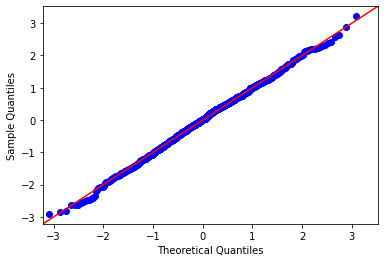

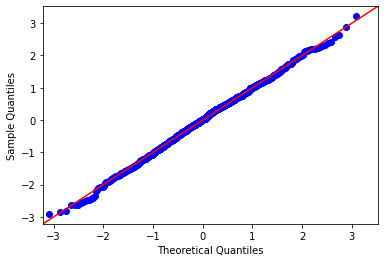

In [10]:
normal_data = sct.norm.rvs(loc=10, scale=4, size=1000)
sm.qqplot(normal_data, fit= True, line='45')

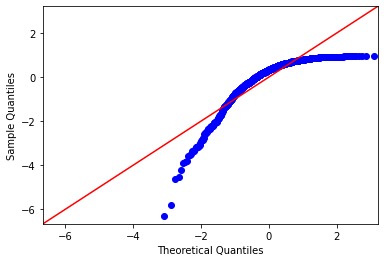

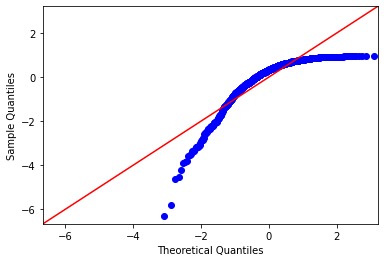

In [11]:
non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=1000)
sm.qqplot(non_normal_data, fit= True, line='45')

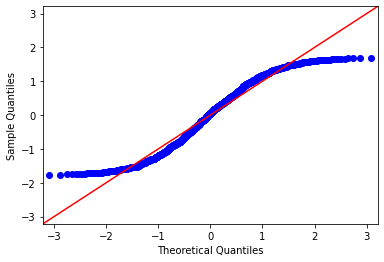

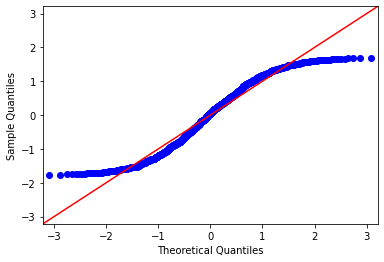

In [12]:
##Gerando amostra aleatoria numpy
a = np.random.randint(-33,450, 1000)
sm.qqplot(a, fit= True, line='45')


## Testes de hipotéses

Bootstrapping is any test or metric that uses random sampling with replacement (e.g. mimicking the sampling process), and falls under the broader class of resampling methods. Bootstrapping assigns measures of accuracy (bias, variance, confidence intervals, prediction error, etc.) to sample estimates. This technique allows estimation of the sampling distribution of almost any statistic using random sampling methods.]

Bootstrapping estimates the properties of an estimator (such as its variance) by measuring those properties when sampling from an approximating distribution. One standard choice for an approximating distribution is the empirical distribution function of the observed data. In the case where a set of observations can be assumed to be from an independent and identically distributed population, this can be implemented by constructing a number of resamples with replacement, of the observed data set (and of equal size to the observed data set).

It may also be used for constructing hypothesis tests. It is often used as an alternative to statistical inference based on the assumption of a parametric model when that assumption is in doubt, or where parametric inference is impossible or requires complicated formulas for the calculation of standard errors.

In [13]:
def permuted_iid_samples(data1: np.ndarray, data2: np.ndarray) -> tuple:
    '''
        Função usada para permutar os dados, normalmente estamos trabalhando com hipoteses de que as duas amostras são iguais. 
        
    '''
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    permuted_sample_1 = permuted_data[:len(data1)]
    permuted_sample_2 = permuted_data[len(data1):]
    
    return permuted_sample_1, permuted_sample_2
       
    

In [14]:
b = np.random.randint(150,350,1000)
a=  np.random.randint(222,350,1000)

In [15]:
def sample_replicates(data1: np.ndarray, data2: np.ndarray, function, size=1) -> list:
    '''
    
    '''
    permuted_replicates = np.empty(size)
    for i in range(size):
        perm_sample1, perm_sample2 = permuted_iid_samples(data1, data2)
        permuted_replicates[i] = function(perm_sample1, perm_sample2)
    
    return permuted_replicates

In [16]:
def means_diff(data1: np.ndarray, data2: np.ndarray) -> float:
    '''
        Retorna a diferença entre as médias de duas amostras
    '''
    return np.mean(data1) - np.mean(data2)

In [17]:
n_bootstrap = 100000
replicates = sample_replicates(a,b, means_diff,n_bootstrap)
empirical = means_diff(a,b)

In [18]:
p = np.sum(replicates >= empirical)/len(replicates)
print(f'The p-value  for the test-statistic of {empirical:.2f} is {p:.3f}')

The p-value  for the test-statistic of 36.58 is 0.000


In [19]:
confidence_interval = np.percentile(replicates,[2.5,97.5])
print(f'Confidence interval is {confidence_interval}')

Confidence interval is [-4.506  4.552]


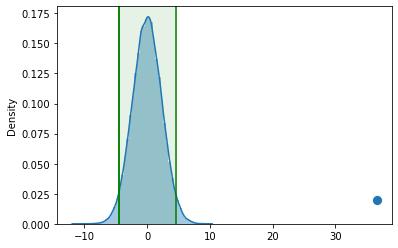

In [21]:
ax = sns.distplot(replicates)
ax.axvline(confidence_interval[0],color = 'green')
ax.axvline(confidence_interval[0],color = 'green')
ax.axvline(confidence_interval[1],color = 'green')
ax.axvspan(confidence_interval[0],confidence_interval[1], color='green', alpha=0.1)
ax = sns.scatterplot(x=np.array([empirical]),y=0.020, s=100)


## Test T

Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [28]:
b = np.random.randint(200,350,1000)
a=  np.random.randint(222,350,1000)

alpha = 1e-3
k1, p = sct.ttest_ind(a,b)
if  p <alpha:
    print(f"The null hypothesis can be rejected. Statics: {np.round(k1,3)}, p-value: {np.round(p,5)}")
else:
    print(f"The null hypothesis cannot be rejected., Statics {k1}, p-value: {p}")


The null hypothesis can be rejected. Statics: 4.514, p-value: 1e-05


## Binomial Test

In [60]:
#A car manufacturer claims that no more than 10% of their cars are unsafe. 15 cars are inspected for safety, 3 were found to be unsafe. Test the manufacturer’s claim:
#alternative: {‘two-sided’, ‘greater’, ‘less’}
p = sct.binom_test(x=3 , n=15, p=0.1, alternative='greater')

if  p <0.05:
    print(f"The null hypothesis can be rejected.  p-value: {np.round(p,5)}")
else:
    print(f"The null hypothesis cannot be rejected. p-value: {p}")


The null hypothesis cannot be rejected. p-value: 0.18406106910639114


## Wilcoxon Signed-Rank Test


Tests whether the distributions of two paired samples are equal or not.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.
- Observations across each sample are paired.

Interpretation

- H0: the distributions of both samples are equal.
- H1: the distributions of both samples are not equal.

In [69]:
b = np.random.randint(225,350,1000)
a=  np.random.randint(222,350,1000)

alpha = 0.05
k1, p = sct.wilcoxon(a,b)
if  p <alpha:
    print(f"The null hypothesis can be rejected. Statics: {np.round(k1,3)}, p-value: {np.round(p,5)}")
else:
    print(f"The null hypothesis cannot be rejected., Statics {k1}, p-value: {p}")


The null hypothesis cannot be rejected., Statics 245512.0, p-value: 0.9773388290072095


## Paired Student’s t-test

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.
- Observations across each sample are paired.

Interpretation

- H0: the means of the samples are equal.
- H1: the means of the samples are unequal.

In [75]:
b = np.arange(10,20,1)
a = np.sort(np.random.randint(10,25, 10))
print(a,b)
alpha = 0.05
k1, p = sct.ttest_rel(a,b)
if  p <alpha:
    print(f"The null hypothesis can be rejected. Statics: {np.round(k1,3)}, p-value: {np.round(p,5)}")
else:
    print(f"The null hypothesis cannot be rejected., Statics {k1}, p-value: {p}")

[10 12 14 16 18 20 22 23 24 24] [10 11 12 13 14 15 16 17 18 19]
The null hypothesis can be rejected. Statics: 5.46, p-value: 0.0004
